In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.quiver as quiver
from mpl_toolkits.mplot3d import Axes3D
import random

# Electrostatics 
## Electric Fields

Simulating some electrostatics physics using python:

1. Point Charge Electric Field
2. Force between two Charges
3. Equipotenial Lines
4. Electric Field of Dipole
5. Electric field due to a plane of charge


In [3]:
class Charge:
    def __init__(self, x, y, z, q):
        self.r = [x,y,z]
        self.pos = np.array(self.r)
        self.q = q


In [4]:
k = 9e9
x, y, z = [0.01, 0.02, 0]
q = 5e-9

q1 = Charge(x, y, z, q)
print(q1.pos, q1.q)

ro = Charge(0, 0, 0, 0)
r1 = Charge(0.02, -0.01, 0, 0)
r = ro.pos - q1.pos

E = k*q1.q*r/np.linalg.norm(r)**3
print("E = ",E, "N/C")
print("|E| = ",np.linalg.norm(E), "N/C")

[0.01 0.02 0.  ] 5e-09
E =  [-40249.223595   -80498.44718999      0.        ] N/C
|E| =  90000.0 N/C


In [5]:
r1 = Charge(0.02, -0.01, 0, 0)
r =  r1.pos - q1.pos 

E = k*q1.q*r/np.linalg.norm(r)**3
print("E = ",E, "N/C")
print("|E| = ",np.linalg.norm(E), "N/C")

E =  [ 14230.24947076 -42690.74841227      0.        ] N/C
|E| =  45000.00000000001 N/C


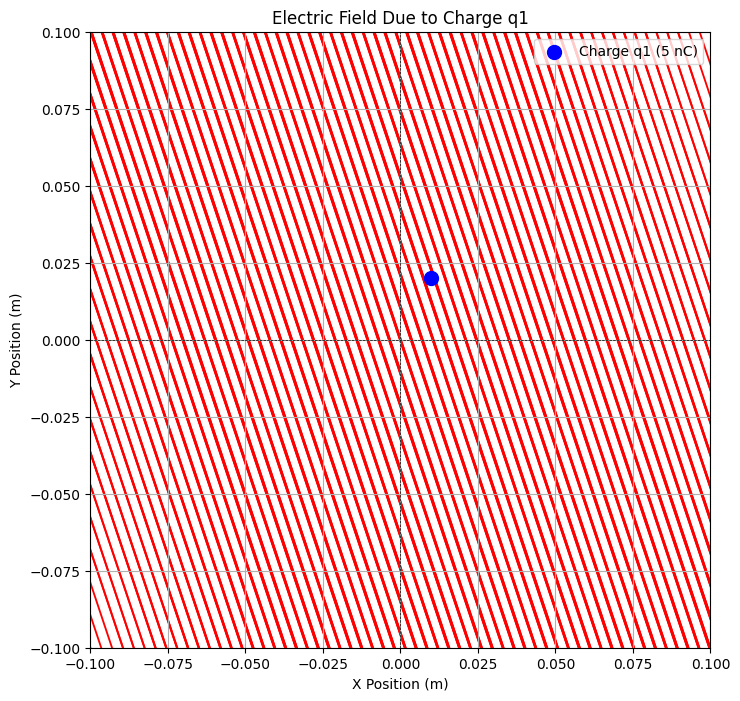

In [6]:
# Create a grid of points
x = np.linspace(-0.1, 0.1, 20)  # x-coordinates
y = np.linspace(-0.1, 0.1, 20)  # y-coordinates
X, Y = np.meshgrid(x, y)  # Create a grid
R = np.array([X, Y])  # Combine into a grid array


# Plotting
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, E[0], E[1], color='r', headlength=2, pivot='middle', scale=5)
plt.scatter(q1.pos[0], q1.pos[1], color='blue', s=100, label='Charge q1 (5 nC)', zorder=5)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.title('Electric Field Due to Charge q1')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid()
plt.show()

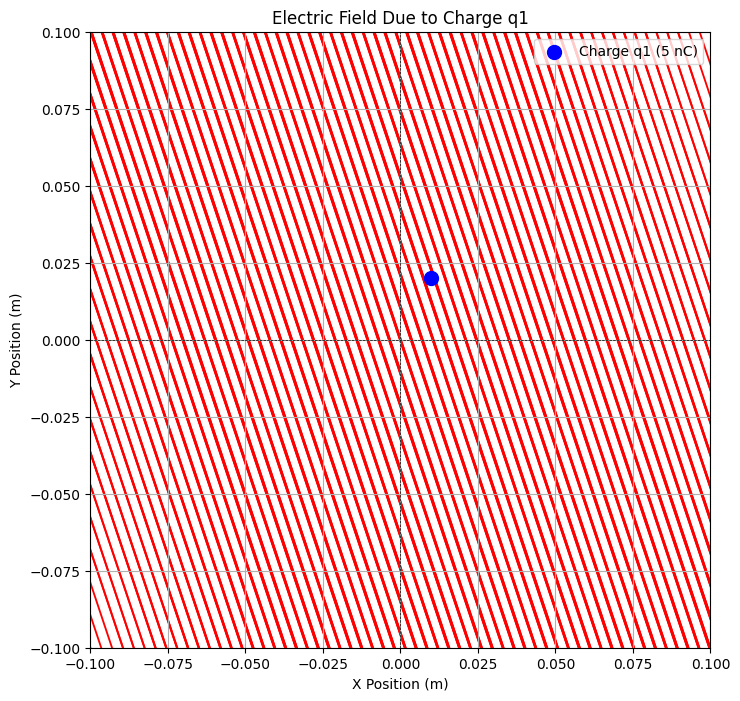

In [7]:
# Create a grid of points
x = np.linspace(-0.1, 0.1, 20)  # x-coordinates
y = np.linspace(-0.1, 0.1, 20)  # y-coordinates
X, Y = np.meshgrid(x, y)  # Create a grid
R = np.array([X, Y])  # Combine into a grid array


# Plotting
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, E[0], E[1], color='r', headlength=2, pivot='middle', scale=5)
plt.scatter(q1.pos[0], q1.pos[1], color='blue', s=100, label='Charge q1 (5 nC)', zorder=5)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.title('Electric Field Due to Charge q1')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid()
plt.show()

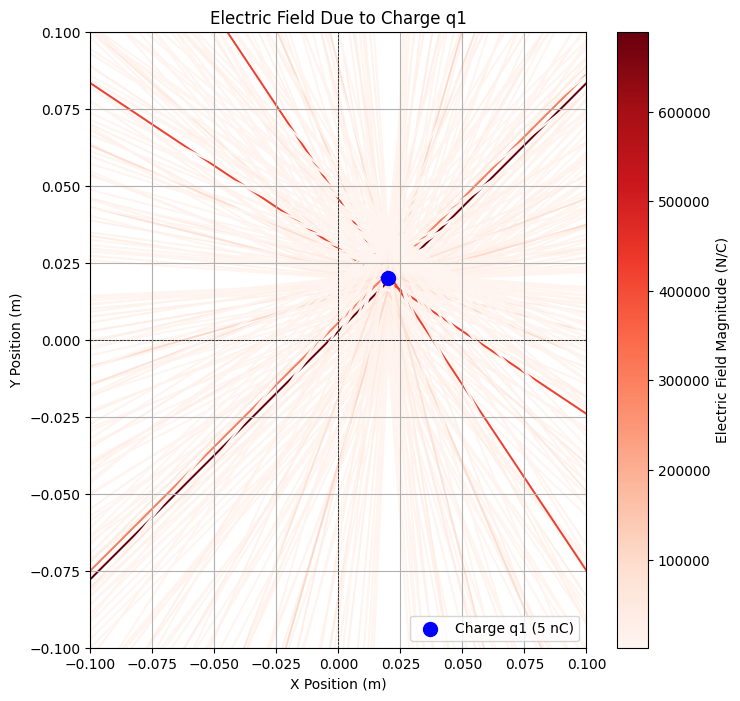

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 9e9  # Coulomb's constant in N m^2/C^2
q1 = 5e-9  # Charge in Coulombs (5 nC)

# Charge position
q1_pos = np.array([0.02, 0.02])  # Position of charge q1 in meters

# Create a grid of points
x = np.linspace(-0.1, 0.1, 15)  # Fewer x-coordinates for less density
y = np.linspace(-0.1, 0.1, 15)  # Fewer y-coordinates for less density
X, Y = np.meshgrid(x, y)  # Create a grid

# Calculate the position vector from charge to each point in the grid
R_q1 = np.array([X - q1_pos[0], Y - q1_pos[1]])  # Position vector from charge to grid

# Magnitude of the vectors
norm_R_q1 = np.linalg.norm(R_q1, axis=0)  # Magnitude of each vector

# Avoid division by zero
norm_R_q1[norm_R_q1 == 0] = 1e-10  # Set a small value to avoid NaNs

# Calculate the electric field vector components
E = k * q1 / norm_R_q1**2  # Magnitude of electric field
Ex = E * (R_q1[0] / norm_R_q1)  # Electric field in x-direction
Ey = E * (R_q1[1] / norm_R_q1)  # Electric field in y-direction

# Plotting
plt.figure(figsize=(8, 8))
# Use quiver to plot the electric field vectors with color representing magnitude
quiver_magnitude = np.sqrt(Ex**2 + Ey**2)  # Calculate overall magnitude for coloring
quiver_plot = plt.quiver(X, Y, Ex, Ey, quiver_magnitude, cmap='Reds', 
                         headlength=22, scale=15, pivot='middle')  # Adjust scale here

# Add the charge at its position
plt.scatter(q1_pos[0], q1_pos[1], color='blue', s=100, label='Charge q1 (5 nC)', zorder=5)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.title('Electric Field Due to Charge q1')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.colorbar(quiver_plot, label='Electric Field Magnitude (N/C)')  # Add a color bar for magnitude reference
plt.legend()
plt.grid()
plt.show()

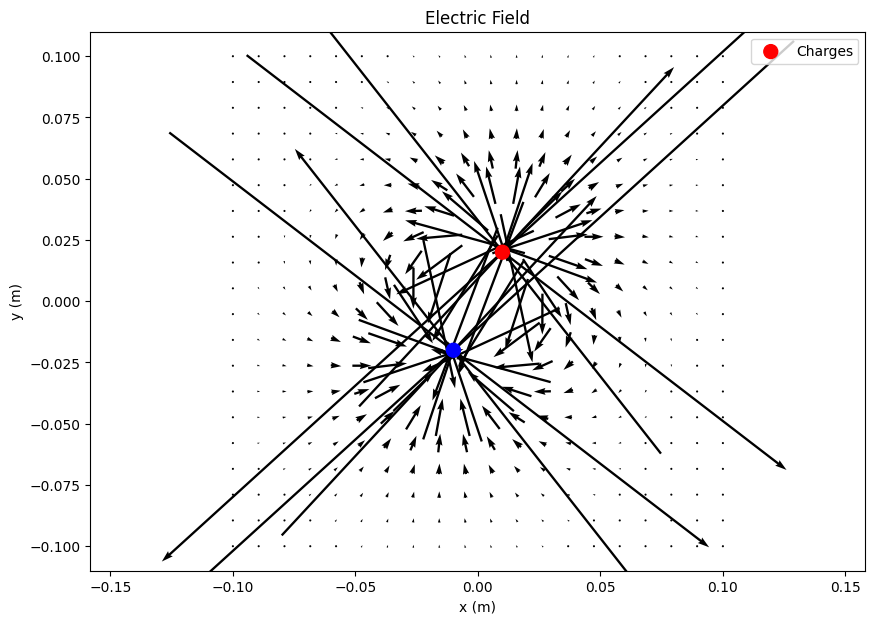

In [9]:
class Charge:
    def __init__(self, x, y, z, q):
        self.pos = np.array([x, y, z])
        self.q = q

def electric_field_at_point(point, charges, k=9e9):
    """Calculate the electric field at a given point due to multiple charges."""
    E = np.zeros(3)
    for charge in charges:
        r = point - charge.pos
        r_magnitude = np.linalg.norm(r)
        if r_magnitude != 0:
            E += k * charge.q * r / r_magnitude**3
    return E

# Create charges
charges = [
    Charge(0.01, 0.02, 0, 5e-9),  # Positive charge
    Charge(-0.01, -0.02, 0, -5e-9)  # Negative charge
]

# Define grid for the 2D plane (z = 0)
x = np.linspace(-0.1, 0.1, 20)
y = np.linspace(-0.1, 0.1, 20)
X, Y = np.meshgrid(x, y)

# Calculate the electric field vectors on the grid
Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j], 0])
        E = electric_field_at_point(point, charges)
        Ex[i, j], Ey[i, j] = E[0], E[1]

# Plot the electric field
plt.figure(figsize=(10, 7))
plt.quiver(X, Y, Ex, Ey, color='black', scale=1e6, pivot='middle')
plt.scatter([charge.pos[0] for charge in charges], 
            [charge.pos[1] for charge in charges], 
            c=['red' if charge.q > 0 else 'blue' for charge in charges], 
            s=100, label="Charges")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field')
plt.legend()
plt.axis('equal')
plt.show()

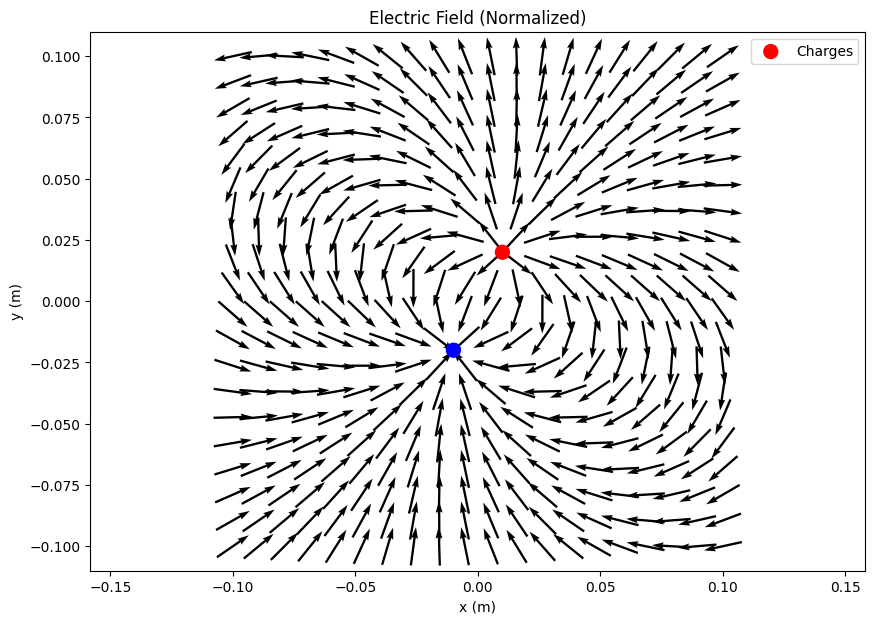

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Charge:
    def __init__(self, x, y, z, q):
        self.pos = np.array([x, y, z])
        self.q = q

def electric_field_at_point(point, charges, k=9e9, min_distance=1e-4):
    """Calculate the electric field at a given point due to multiple charges."""
    E = np.zeros(3)
    for charge in charges:
        r = point - charge.pos
        r_magnitude = np.linalg.norm(r)
        if r_magnitude > min_distance:  # Ignore points too close to charges
            E += k * charge.q * r / r_magnitude**3
    return E

# Create charges
charges = [
    Charge(0.01, 0.02, 0, 5e-9),  # Positive charge
    Charge(-0.01, -0.02, 0, -5e-9)  # Negative charge
]

# Define grid for the 2D plane (z = 0)
x = np.linspace(-0.1, 0.1, 20)
y = np.linspace(-0.1, 0.1, 20)
X, Y = np.meshgrid(x, y)

# Calculate the electric field vectors on the grid
Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j], 0])
        E = electric_field_at_point(point, charges)
        Ex[i, j], Ey[i, j] = E[0], E[1]

# Normalize vectors for visualization
magnitude = np.sqrt(Ex**2 + Ey**2)
Ex /= np.maximum(magnitude, 1e-6)  # Avoid division by zero
Ey /= np.maximum(magnitude, 1e-6)

# Plot the electric field
plt.figure(figsize=(10, 7))
plt.quiver(X, Y, Ex, Ey, color='black', pivot='middle', scale=20)
plt.scatter([charge.pos[0] for charge in charges], 
            [charge.pos[1] for charge in charges], 
            c=['red' if charge.q > 0 else 'blue' for charge in charges], 
            s=100, label="Charges")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field (Normalized)')
plt.legend()
plt.axis('equal')
plt.show()


## Finding $\vec{E}$ due to a charged sphere using Monte Carlo


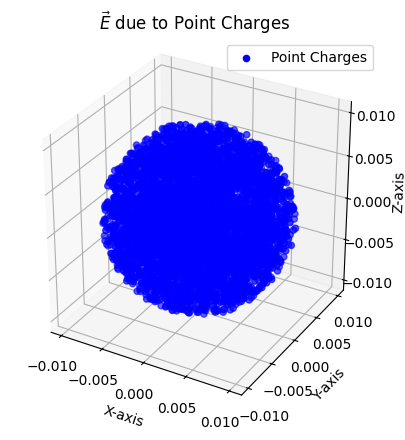

E due to sphere =  7633117.6762154335 N/C
E due to sphere (theory) =  270000000.0 N/C


In [11]:
# Finding $\vec{E}$ due to a charged sphere using Monte Carlo

def E(rq, ro, q):
    k = 9e9  # Coulomb's constant
    r = ro - rq
    Etemp = k * q * r / np.linalg.norm(r)**3
    return Etemp

# Parameters
Q = 3e-6  # total charge
R = 0.01  # sphere radius
N = 10000   # number of point charges

# Initialize lists for points and electric fields
E_total = np.zeros((N, 3))
points = []

# Randomly distribute point charges within the sphere
for n in range(N):
    rt = R * np.array([1 - 2 * random.random(),
                       1 - 2 * random.random(),
                       1 - 2 * random.random()])
    if np.linalg.norm(rt) < R:  # Use only points within the sphere
        points.append(rt)
        dQ = Q / N
        E_total[n] = E(rt, np.zeros(3), dQ)

# Convert list to numpy array
points = np.array(points)
E_avg = np.sum(E_total, axis=0)  # total electric field

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='b', marker='o', label='Point Charges')

# Settings for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(r'$\vec{E}$ due to Point Charges')
ax.legend()
ax.set_box_aspect([1,1,1])  # Equal aspect ratio

plt.show()
E_norm = np.linalg.norm(E_avg)
print("E due to sphere = ", E_norm, "N/C")
E_theory = k*Q/(R**2)
print("E due to sphere (theory) = ", E_theory, "N/C")

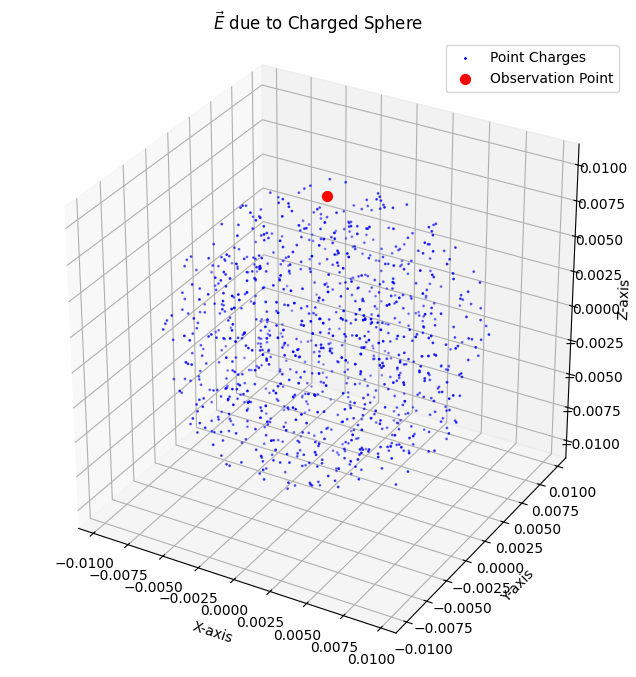

Monte Carlo Electric Field = 2.18e+08 N/C
Theoretical Electric Field = 2.70e+08 N/C


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

def E(rq, ro, q):
    k = 9e9  # Coulomb's constant
    r = ro - rq
    r_norm = np.linalg.norm(r)
    if r_norm > 1e-6:  # Avoid division by zero
        return k * q * r / r_norm**3
    else:
        return np.zeros(3)

# Parameters
Q = 3e-6  # total charge
R = 0.01  # sphere radius
N = 1000  # number of point charges
observation_point = np.array([0, 0, R])  # Outside the sphere for comparison

# Generate random points uniformly in the sphere
points = []
while len(points) < N:
    r = np.array([random.uniform(-R, R), random.uniform(-R, R), random.uniform(-R, R)])
    if np.linalg.norm(r) <= R:  # Inside sphere
        points.append(r)

points = np.array(points)


# Assign charge to each point
dQ = Q / N

# Calculate the total electric field
E_total = np.zeros(3)
for rq in points:
    E_total += E(rq, observation_point, dQ)

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='b', s=1, label='Point Charges')
ax.scatter(observation_point[0], observation_point[1], observation_point[2], color='r', s=50, label='Observation Point')

# Settings for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(r'$\vec{E}$ due to Charged Sphere')
ax.legend()
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

plt.show()

# Results
E_norm = np.linalg.norm(E_total)
E_theory = 9e9 * Q / R**2  # Theoretical field outside sphere
print("Monte Carlo Electric Field = {:.2e} N/C".format(E_norm))
print("Theoretical Electric Field = {:.2e} N/C".format(E_theory))

Total Electric Field =  [2.57191733e+07 1.02250048e+07 2.17394767e+08] N/C
|E| =  219149518.18948814 N/C
Ec1 =  15273506.473629422 N/C
Ec2 =  21599999.999999996 N/C


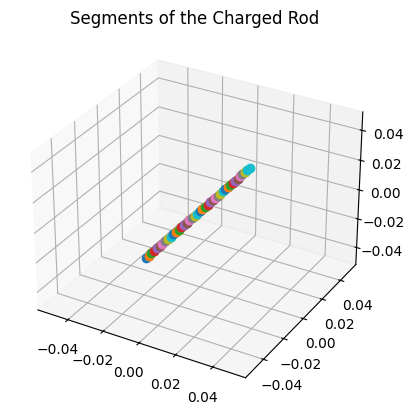

In [14]:
# Existing parameters (from your code)
k = 9e9  # Coulomb's constant
L = 0.1  # Rod length
Q = 6e-6  # Total charge
N = 40  # Number of segments
dQ = Q / N  # Charge per segment
dL = L / N  # Length of each segment

rstart=0.05
# Initialize arrays for the segment positions
segment_positions = np.zeros((N, 3))
ro = np.array([rstart, 0, 0]) 
# Get the positions of each segment
for n in range(N):
    rq = np.array([0, -L / 2 + (n + 0.5) * dL, 0])  # Position of the segment (centered)
    segment_positions[n] = rq  # Store segment position
    r = ro - rq  # Position vector from charge to segment
    dE = k * dQ * r / np.linalg.norm(r)**3  # Electric field due to segment
    E_total += dE  # Add to total electric

# Print the total electric field
print("Total Electric Field = ", E_total, "N/C")
print("|E| = ", np.linalg.norm(E_total), "N/C")
Ec1 = k * Q/(rstart*np.sqrt(rstart**2 + (L/2)**2))
Ec2 = k * 2*Q/(L*rstart)
print("Ec1 = ", Ec1, "N/C")
print("Ec2 = ", Ec2, "N/C")



# Plot the segments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each segment as a line
for n in range(N):
    x = [segment_positions[n][0], segment_positions[n][0]]
    y = [segment_positions[n][1] - dL / 2, segment_positions[n][1] + dL / 2]
    z = [segment_positions[n][2], segment_positions[n][2]]
    ax.plot(x, y, z, marker='o', label=f'Segment {n+1}')




ax.set_title('Segments of the Charged Rod')

plt.show()

Total Electric Field =  [ 1.52746996e+07 -2.61934474e-10  0.00000000e+00] N/C
|E| =  15274699.607300323 N/C
Ec1 =  15273506.473629422 N/C
Ec2 =  21599999.999999996 N/C


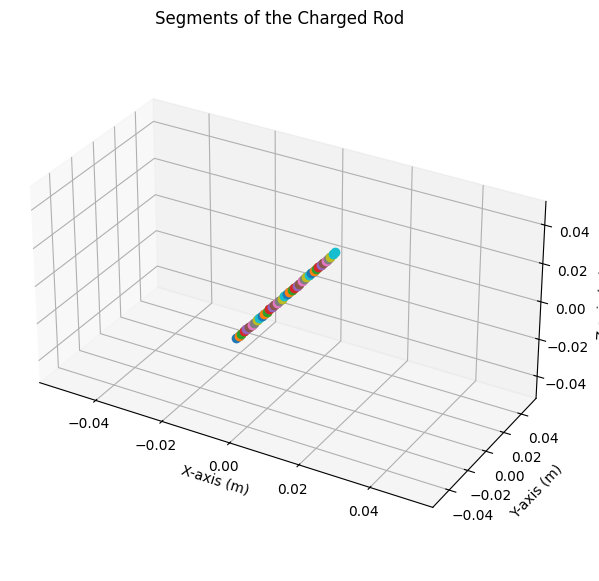

In [15]:
# Constants and parameters
k = 9e9  # Coulomb's constant (N·m²/C²)
L = 0.1  # Rod length (m)
Q = 6e-6  # Total charge (C)
N = 40  # Number of segments
dQ = Q / N  # Charge per segment (C)
dL = L / N  # Length of each segment (m)
rstart = 0.05  # Distance of observation point from the rod center (m)

# Observation point
ro = np.array([rstart, 0, 0])  # Observation point (x, y, z)

# Initialize arrays
segment_positions = np.zeros((N, 3))  # Store segment positions
E_total = np.zeros(3)  # Total electric field (x, y, z)

# Calculate the electric field
for n in range(N):
    rq = np.array([0, -L / 2 + (n + 0.5) * dL, 0])  # Segment center position
    segment_positions[n] = rq  # Store segment position
    r = ro - rq  # Position vector from segment to observation point
    dE = k * dQ * r / np.linalg.norm(r)**3  # Electric field due to segment
    E_total += dE  # Add to total electric field

# Print the total electric field and its magnitude
print("Total Electric Field = ", E_total, "N/C")
print("|E| = ", np.linalg.norm(E_total), "N/C")

# Theoretical values for comparison
Ec1 = k * Q / (rstart * np.sqrt(rstart**2 + (L / 2)**2))  # Approximation 1
Ec2 = k * 2 * Q / (L * rstart)  # Approximation 2 (infinite rod)
print("Ec1 = ", Ec1, "N/C")
print("Ec2 = ", Ec2, "N/C")

# Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each segment as a line
for n in range(N):
    x = [segment_positions[n][0], segment_positions[n][0]]
    y = [segment_positions[n][1] - dL / 2, segment_positions[n][1] + dL / 2]
    z = [segment_positions[n][2], segment_positions[n][2]]
    ax.plot(x, y, z, marker='o')

# Add titles and labels
ax.set_title('Segments of the Charged Rod')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_box_aspect([2, 1, 1])  # Adjust aspect ratio

plt.show()